In [161]:
import pandas as pd

In [162]:
df=pd.read_csv("PKCOVID19.csv")

In [163]:
df

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2/26/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
1,2/26/2020,2,0,0,Iran/Taftan,Sindh,Karachi
2,2/29/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
3,2/29/2020,1,0,0,Iran/Taftan,Sindh,Karachi
4,03-02-20,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit
...,...,...,...,...,...,...,...
2793,5/30/2020,952,36,394,NaN,Punjab,Lahore
2794,5/31/2020,1184,22,120,NaN,Punjab,Lahore
2795,06-01-20,1610,43,95,NaN,Punjab,Lahore
2796,06-02-20,1639,30,353,NaN,Punjab,Lahore


In [164]:
def format_year(d):
    return d.replace("2020","20")

In [165]:
df["Date"] = df["Date"].apply(lambda text: format_year(text))

In [166]:
from datetime import datetime
def format_date(date):
    date="{}".format(date)
    if date[1]=='/' or date[2]=='/':
        objDate = datetime.strptime(date, '%m/%d/%y')
        m=objDate.month
        d=objDate.day
        y=objDate.year
    
    elif date[1]=='-' or date[2]=='-':
        objDate = datetime.strptime(date, '%m-%d-%y')
        m=objDate.month
        d=objDate.day
        y=objDate.year
    
    return "{}/{}/{}".format(m,d,y) 
    
    
    
    


In [167]:
df["Date"] = df["Date"].apply(lambda text: format_date(text))

In [168]:
death=[]
dat=""
year=2020
for month in range(2,6):
    for day in range(1,32):
        dat="{}/{}/{}".format(month,day,year)
        total=0
        iterator=-1
        for d in df.Date:
            iterator+=1
            if d==dat:
                total+=int(df["Deaths"][iterator])
        if total!=0:
            death.append(total)
            
        

In [169]:
print(death)

[1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 6, 4, 4, 4, 5, 5, 4, 3, 5, 3, 7, 4, 4, 15, 7, 4, 11, 11, 16, 4, 11, 18, 18, 23, 13, 8, 11, 14, 12, 23, 5, 19, 15, 23, 24, 30, 24, 28, 49, 28, 31, 19, 23, 38, 39, 36, 33, 31, 39, 30, 46, 46, 32, 43, 34, 32, 34, 30, 27, 36, 59, 78, 88, 60]


In [170]:
cases=[]
dat=""
year=2020
for month in range(2,6):
    for day in range(1,32):
        dat="{}/{}/{}".format(month,day,year)
        total=0
        iterator=-1
        for d in df.Date:
            iterator+=1
            if d==dat:
                total+=int(df["Cases"][iterator])
        if total!=0:
            cases.append(total)



In [171]:
print(cases)

[3, 2, 1, 1, 9, 3, 1, 1, 9, 34, 151, 52, 57, 154, 50, 134, 110, 82, 114, 110, 131, 122, 184, 87, 145, 223, 260, 183, 239, 79, 180, 249, 107, 337, 874, 156, 297, 253, 173, 628, 321, 683, 512, 285, 583, 707, 677, 767, 641, 534, 922, 660, 739, 730, 948, 665, 1070, 1123, 1342, 1052, 1023, 1804, 863, 1829, 2554, 1463, 1079, 2254, 1432, 1449, 1515, 1372, 1956, 1800, 1874, 2115, 2539, 1728, 2060, 1744, 1356, 1440, 2173, 2562, 2426, 2956, 2883]


In [172]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [173]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [180]:
# define input sequence
timeseries_data = cases
# choose a number of time steps
n_steps = 4
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [181]:
print(X),print(y)

[[   3    2    1    1]
 [   2    1    1    9]
 [   1    1    9    3]
 [   1    9    3    1]
 [   9    3    1    1]
 [   3    1    1    9]
 [   1    1    9   34]
 [   1    9   34  151]
 [   9   34  151   52]
 [  34  151   52   57]
 [ 151   52   57  154]
 [  52   57  154   50]
 [  57  154   50  134]
 [ 154   50  134  110]
 [  50  134  110   82]
 [ 134  110   82  114]
 [ 110   82  114  110]
 [  82  114  110  131]
 [ 114  110  131  122]
 [ 110  131  122  184]
 [ 131  122  184   87]
 [ 122  184   87  145]
 [ 184   87  145  223]
 [  87  145  223  260]
 [ 145  223  260  183]
 [ 223  260  183  239]
 [ 260  183  239   79]
 [ 183  239   79  180]
 [ 239   79  180  249]
 [  79  180  249  107]
 [ 180  249  107  337]
 [ 249  107  337  874]
 [ 107  337  874  156]
 [ 337  874  156  297]
 [ 874  156  297  253]
 [ 156  297  253  173]
 [ 297  253  173  628]
 [ 253  173  628  321]
 [ 173  628  321  683]
 [ 628  321  683  512]
 [ 321  683  512  285]
 [ 683  512  285  583]
 [ 512  285  583  707]
 [ 285  583

(None, None)

In [182]:
X.shape

(83, 4)

In [183]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [184]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Train on 83 samples
Epoch 1/300
83/83 [==============================] - 4s 50ms/sample - loss: 1355643.5286
Epoch 2/300
83/83 [==============================] - 0s 602us/sample - loss: 1291134.3584
Epoch 3/300
83/83 [==============================] - 0s 566us/sample - loss: 1232257.8050
Epoch 4/300
83/83 [==============================] - 0s 566us/sample - loss: 1174483.2741
Epoch 5/300
83/83 [==============================] - 0s 566us/sample - loss: 1084186.0557
Epoch 6/300
83/83 [==============================] - 0s 542us/sample - loss: 993860.8750
Epoch 7/300
83/83 [==============================] - 0s 542us/sample - loss: 881503.9247
Epoch 8/300
83/83 [==============================] - 0s 542us/sample - loss: 687259.8690
Epoch 9/300
83/83 [==============================] - 0s 590us/sample - loss: 516998.0505
Epoch 10/300
83/83 [==============================] - 0s 614us/sample - loss: 374993.2952
Epoch 11/300
83/83 [==============================] - 0s 542us/sample - loss: 221279.

83/83 [==============================] - 0s 614us/sample - loss: 83208.7381
Epoch 93/300
83/83 [==============================] - 0s 518us/sample - loss: 82202.9175
Epoch 94/300
83/83 [==============================] - 0s 578us/sample - loss: 80479.9856
Epoch 95/300
83/83 [==============================] - 0s 554us/sample - loss: 79429.6239
Epoch 96/300
83/83 [==============================] - 0s 590us/sample - loss: 78532.2642
Epoch 97/300
83/83 [==============================] - 0s 566us/sample - loss: 77570.5351
Epoch 98/300
83/83 [==============================] - 0s 614us/sample - loss: 77671.5893
Epoch 99/300
83/83 [==============================] - 0s 566us/sample - loss: 81449.7998
Epoch 100/300
83/83 [==============================] - 0s 614us/sample - loss: 86259.4563
Epoch 101/300
83/83 [==============================] - 0s 590us/sample - loss: 83098.0659
Epoch 102/300
83/83 [==============================] - 0s 626us/sample - loss: 77284.0851
Epoch 103/300
83/83 [==========

83/83 [==============================] - 0s 554us/sample - loss: 62513.2449
Epoch 184/300
83/83 [==============================] - 0s 530us/sample - loss: 62006.2569
Epoch 185/300
83/83 [==============================] - 0s 469us/sample - loss: 63071.2501
Epoch 186/300
83/83 [==============================] - 0s 530us/sample - loss: 63308.7195
Epoch 187/300
83/83 [==============================] - 0s 542us/sample - loss: 62000.8707
Epoch 188/300
83/83 [==============================] - 0s 518us/sample - loss: 61620.5111
Epoch 189/300
83/83 [==============================] - 0s 518us/sample - loss: 61927.1673
Epoch 190/300
83/83 [==============================] - 0s 506us/sample - loss: 60661.8901
Epoch 191/300
83/83 [==============================] - 0s 530us/sample - loss: 62428.5507
Epoch 192/300
83/83 [==============================] - 0s 554us/sample - loss: 63197.4282
Epoch 193/300
83/83 [==============================] - 0s 638us/sample - loss: 64349.8393
Epoch 194/300
83/83 [===

83/83 [==============================] - 0s 542us/sample - loss: 58448.8058
Epoch 275/300
83/83 [==============================] - 0s 530us/sample - loss: 58396.2620
Epoch 276/300
83/83 [==============================] - 0s 481us/sample - loss: 58322.1379
Epoch 277/300
83/83 [==============================] - 0s 481us/sample - loss: 59426.1243
Epoch 278/300
83/83 [==============================] - 0s 506us/sample - loss: 59242.2928
Epoch 279/300
83/83 [==============================] - 0s 530us/sample - loss: 59289.7116
Epoch 280/300
83/83 [==============================] - 0s 506us/sample - loss: 59625.2172
Epoch 281/300
83/83 [==============================] - 0s 481us/sample - loss: 58429.7423
Epoch 282/300
83/83 [==============================] - 0s 518us/sample - loss: 56406.6321
Epoch 283/300
83/83 [==============================] - 0s 506us/sample - loss: 59283.0463
Epoch 284/300
83/83 [==============================] - 0s 506us/sample - loss: 60486.9886
Epoch 285/300
83/83 [===

In [185]:

# demonstrate prediction for next 10 days
import tensorflow as tf
from numpy import array
x_input =array([ 2173, 2562, 2426, 2956, 2883])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<30):
    
    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        x_input=tf.cast(x_input,tf.float32)
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        x_input=tf.cast(x_input,tf.float32)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)


0 day input [2562 2426 2956 2883]
0 day output [[2974.5212]]
1 day input [2426.         2956.         2883.         2974.52124023]
1 day output [[3082.7224]]
2 day input [2956.         2883.         2974.52124023 3082.72241211]
2 day output [[3321.2676]]
3 day input [2883.         2974.52124023 3082.72241211 3321.26757812]
3 day output [[3415.158]]
4 day input [2974.5212 3082.7224 3321.2676 3415.158 ]
4 day output [[3536.9824]]
5 day input [3082.7224 3321.2676 3415.158  3536.9824]
5 day output [[3699.0405]]
6 day input [3321.2676 3415.158  3536.9824 3699.0405]
6 day output [[3893.8345]]
7 day input [3415.158  3536.9824 3699.0405 3893.8345]
7 day output [[4042.6963]]
8 day input [3536.9824 3699.0405 3893.8345 4042.6963]
8 day output [[4205.0005]]
9 day input [3699.0405 3893.8345 4042.6963 4205.0005]
9 day output [[4396.414]]
10 day input [3893.8345 4042.6963 4205.0005 4396.414 ]
10 day output [[4599.4976]]
11 day input [4042.6963 4205.0005 4396.414  4599.4976]
11 day output [[4788.847]]

In [186]:
import matplotlib.pyplot as plt

In [187]:
day_new=np.arange(1,88)
day_pred=np.arange(88,118)

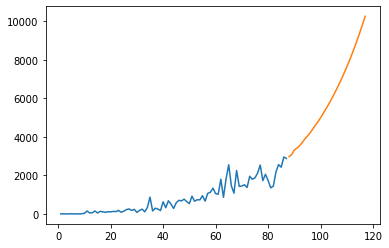

In [188]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)